#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 9 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path 
import cv2

#**Question-1**

###Dataset Pre-Processing

In [59]:
with open("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-9/wine.names") as dataInfo:
    print(dataInfo.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-9/wine.data", sep = ',', header = None, names=["Target", "Alcohol", "Malic Acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"])
dataset

,Target,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [62]:
dataset = dataset.dropna()
dataset

,Target,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in dataset.columns:
    if(i!='Target'):
        dataset[[i]] = scaler.fit_transform(dataset[[i]])

In [64]:
dataset

,Target,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,3,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,3,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,3,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [65]:
X = dataset.drop(labels='Target', axis=1)
Y = dataset.iloc[:,0]

##**a)** Use any dimension reduction technique of your choice, visualize the data and by looking at the plot tell which value of k will be best suited for k-means clustering and why? (no need to use any method to find optimal k).

In [66]:
X = dataset.to_numpy()
pca = PCA(n_components=3)
X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.38203095 0.18364233 0.10635   ]
[30.40784829 21.08253394 16.04372322]


In [67]:
x_train, x_test, y_train, y_test = tts(X, Y, train_size=0.70, random_state=42)

In [68]:
x_train

array([[-3.25849047, -0.34333868, -1.02745036],
       [ 0.35957446,  2.09721131, -0.47162935],
       [ 1.15963098,  0.7654933 , -1.18309682],
       [ 1.61881461, -0.65813994,  0.45787893],
       [ 0.68981127,  2.30997304,  0.11521492],
       [ 2.71420461,  0.08858775, -0.31195343],
       [-4.38871962, -0.64040721, -1.45924051],
       [ 0.96040965,  2.5617029 , -1.08576951],
       [ 1.83011853,  1.39527221, -1.23664708],
       [-3.12021417, -1.27014135, -1.21357576],
       [ 1.97152882, -0.61263425, -1.19129964],
       [ 2.6333408 , -1.17767244, -0.9772427 ],
       [ 1.47616184,  0.09070625, -1.3874574 ],
       [-2.44263433, -1.15838836, -1.24481952],
       [ 1.25157701, -0.86848904,  2.02616537],
       [ 1.85003207, -0.05306193, -0.16754655],
       [ 2.36887595, -0.17907504,  0.79053076],
       [-3.3814532 ,  0.25661002, -0.84750241],
       [-0.84395484,  2.44645906, -1.56355925],
       [ 3.60054096, -1.30898819, -0.42219866],
       [-3.73231849, -1.26593327, -0.111

In [69]:
y_train_red = y_train.tolist()

In [70]:
x_red = pd.DataFrame(x_train, columns = ['Column_1','Column_2','Column_3'])
x_red['Target'] = y_train_red

In [71]:
x_red

,Column_1,Column_2,Column_3,Target
0,-3.258490,-0.343339,-1.027450,3
1,0.359574,2.097211,-0.471629,2
2,1.159631,0.765493,-1.183097,2
3,1.618815,-0.658140,0.457879,1
4,0.689811,2.309973,0.115215,2
...,...,...,...,...
119,1.556702,0.950979,1.953347,2
120,-0.361086,2.170314,-0.481441,2
121,4.390596,-2.105344,-1.263022,1
122,-1.845398,1.565810,-0.090241,2


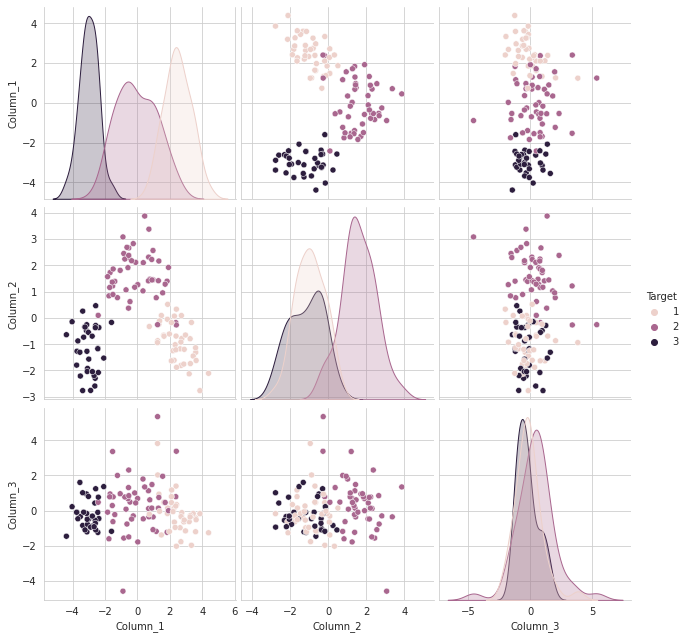

In [72]:
sns.pairplot(x_red, hue='Target', size=3);
plt.show()

##**b)** Build a k-means clustering algorithm( can use sklearn library) and implement using the value of k what you have chosen above. Visualize part b by showing the clusters along with the centroids.

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x_test)

In [74]:
for i in range(len(y_train_red)):
    y_train_red[i] = y_train_red[i] - 1
y_train_red

[2,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1]

In [75]:
print("True Class Labels :- ")
print(y_train_red)

print("Predicted Class labels :- ")
print(kmeans.labels_)

True Class Labels :- 
[2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1]
Predicted Class labels :- 
[0 0 1 0 2 0 2 1 2 1 0 1 0 2 0 2 2 2 0 2 0 2 2 1 1 1 2 2 2 0 0 2 1 0 0 0 1
 1 2 1 0 2 2 2 1 0 2 2 1 0 2 0 0 1]


In [76]:
df = pd.DataFrame(x_test)

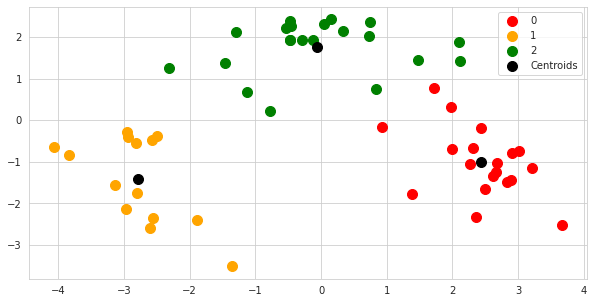

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(df.iloc[y_kmeans == 0, 0], df.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 0)
plt.scatter(df.iloc[y_kmeans == 1, 0], df.iloc[y_kmeans == 1, 1], s = 100, c = 'orange', label = 1)
plt.scatter(df.iloc[y_kmeans == 2, 0], df.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 2)

#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

##**c)** Use different values of k and find the Silhouette Score and then tell which value of k will be optimal and why?

In [78]:
from sklearn.metrics import silhouette_score

r = list(range(2,10))

for n in r:
  KMean= KMeans(n_clusters=n)
  KMean.fit(x_train)
  label=KMean.predict(x_test)

  print(n,'=',silhouette_score(x_test, label))

2 = 0.3876650726851697
3 = 0.48221627580044124
4 = 0.4279211731399244
5 = 0.34410264575214344
6 = 0.38961282302856437
7 = 0.27546660498663444
8 = 0.24373741374635852
9 = 0.21579682113485135


##**d)** There are few methods to find the optimal k value for k-means algorithm like the Elbow Method . Use the above method to find the optimal value of k.

In [79]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

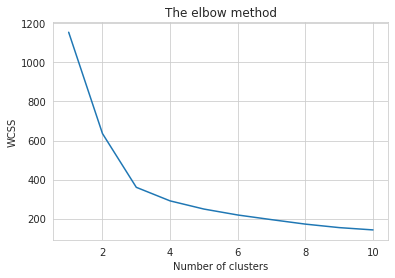

In [80]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#**Question-2**

##**a)** Implement a k-means clustering algorithm from scratch.
##**b)** Make sure that it should:
##i) Be a class which will be able to store the cluster centers.
##ii) Take a value of k from users to give k clusters.
##iii) Be able to take initial cluster center points from the user as its initialization.
##iv) Stop iterating when it converges (cluster centers are not changing anymore) or, a maximum iteration (given as max_iter by user) is reached.

In [81]:
def euclideanDistance(x1, x2):
    euDistance = np.sqrt(np.sum(np.square(x1 - x2)))
    return euDistance

class KMeansAlgorithm:
    def __init__(self, K=10, max_iters=160):
        self.K = K
        self.max_iters = max_iters
        self.centroids = []
        l = []
        for i in range(self.K):
            l.append([])
        self.clusters = l     

    def fit(self, X, flag):
        self.X = X
        self.Samples = X.shape[0]
        self.Features = X.shape[1]
        if(flag==True):
            random_sample_idxs = np.random.choice(self.Samples, self.K, replace=False)
        else:
            random_sample_idxs = []
            for i in range(10):
                random_sample_idxs.append(np.random.choice(len(X[y==i]),1, replace=False)[0])
        centroidList = []
        for idx in random_sample_idxs:
            centroidList.append(self.X[idx])
        self.centroids = centroidList

        for iter in range(self.max_iters):
            self.clusters = self.createClusters(self.centroids)
            centroidsOld = self.centroids
            self.centroids = self.getNewCentroids(self.clusters)
            if self.isConverged(centroidsOld, self.centroids):
                break
        return self.getClusterLabels(self.clusters)

    def getClusterLabels(self, clusters):
        labels = np.empty(self.Samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def createClusters(self, centroids):
        clusters = []
        for i in range(self.K):
            clusters.append([])
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closestCentroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def closestCentroid(self, sample, centroids):
        distances = []
        for point in centroids:
            distances.append(euclideanDistance(sample, point))
        closest_index = np.argmin(distances)
        return closest_index

    def getNewCentroids(self, clusters):
        centroids = np.zeros((self.K, self.Features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def isConverged(self, centroids_old, centroids):
        distances = []
        for i in range(self.K):
            distances.append(euclideanDistance(centroids_old[i], centroids[i]))
        if(sum(distances) == 0):
            res = True
        else:
            res = False
        return res

##**c)** Train the k-means model on f-MNIST data with k = 10 and 10 random 784 dimensional points (in input range) as initializations. Report the number of points in each cluster.

In [82]:
trainDataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-9/Q-2/fashion-mnist_train.csv")

In [83]:
trainDataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X = trainDataset.drop(['label'], axis = 1)

In [85]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
X = X.values
X.shape

(60000, 784)

In [87]:
y = trainDataset['label']
y = y.values
y

array([2, 9, 6, ..., 8, 8, 7])

In [88]:
import numpy as np
clusters = len(np.unique(y))
kMeans1 = KMeansAlgorithm(K=clusters, max_iters=150)
y_pred1 = kMeans1.fit(X, flag = True)

In [132]:
kMeans1.centroids

array([[0.00000000e+00, 1.77514793e-02, 1.77514793e-02, ...,
        1.02789941e+01, 4.98047337e+00, 3.55621302e-01],
       [3.08463466e-03, 3.08463466e-03, 9.25390399e-03, ...,
        1.34952767e-02, 1.92789666e-03, 2.12068633e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.55852629e-04, 8.57106307e-03, 6.23001151e-02, ...,
        2.50108737e+00, 5.84239478e-01, 5.99974415e-02],
       [8.03616273e-04, 5.02260171e-03, 3.61627323e-02, ...,
        6.44821698e+00, 9.35710698e-01, 5.98694124e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [133]:
kMeans1.clusters

[[12,
  42,
  67,
  114,
  117,
  160,
  171,
  177,
  209,
  253,
  265,
  302,
  303,
  331,
  355,
  365,
  387,
  397,
  424,
  425,
  459,
  469,
  490,
  491,
  519,
  524,
  558,
  565,
  585,
  597,
  604,
  611,
  619,
  624,
  685,
  695,
  702,
  708,
  725,
  748,
  760,
  817,
  821,
  828,
  847,
  860,
  879,
  889,
  901,
  918,
  937,
  1023,
  1030,
  1033,
  1043,
  1050,
  1051,
  1067,
  1068,
  1093,
  1110,
  1111,
  1170,
  1182,
  1204,
  1241,
  1242,
  1245,
  1259,
  1365,
  1427,
  1434,
  1493,
  1496,
  1498,
  1511,
  1513,
  1519,
  1543,
  1624,
  1649,
  1660,
  1684,
  1718,
  1741,
  1819,
  1849,
  1858,
  1859,
  1892,
  1894,
  1896,
  1913,
  1948,
  1952,
  1980,
  2008,
  2037,
  2061,
  2074,
  2078,
  2090,
  2139,
  2140,
  2164,
  2170,
  2177,
  2181,
  2189,
  2191,
  2196,
  2202,
  2234,
  2236,
  2248,
  2249,
  2308,
  2334,
  2351,
  2355,
  2365,
  2378,
  2389,
  2397,
  2412,
  2417,
  2453,
  2454,
  2458,
  2460,
  2473,
  2480

In [89]:
from collections import Counter

In [90]:
y_Pred1 = [int(x) for x in y_pred1]

In [91]:
Counter(y_Pred1)

Counter({0: 3380,
         1: 5187,
         2: 6598,
         3: 5381,
         4: 7472,
         5: 2645,
         6: 3805,
         7: 7817,
         8: 9955,
         9: 7760})

##**d)** Visualize the cluster centers of each cluster as 2-d images of all clusters.

In [92]:
cn = kMeans1.centroids

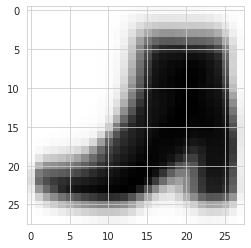

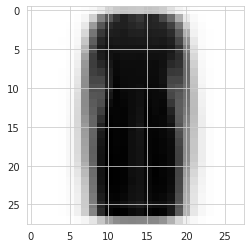

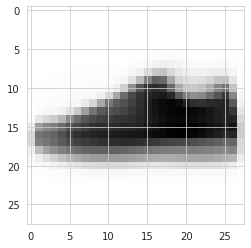

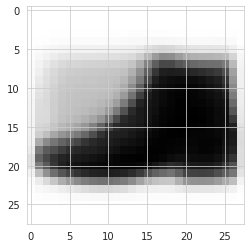

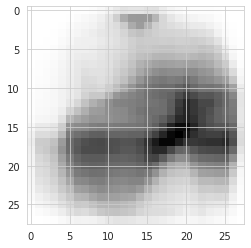

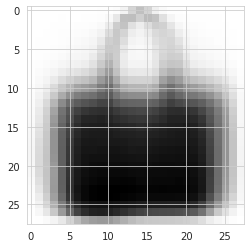

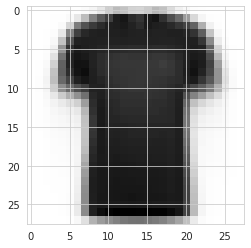

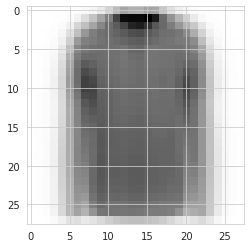

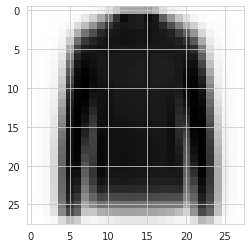

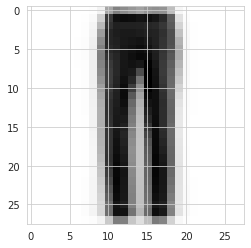

In [93]:
for i in range(0,10):
    img = cn[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

##**e)** Visualize 10 images corresponding to each cluster.

Cluster= 0


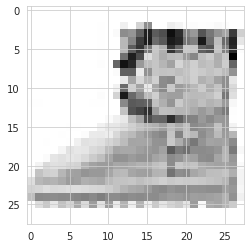

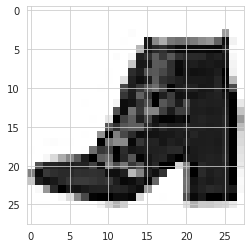

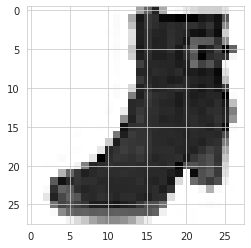

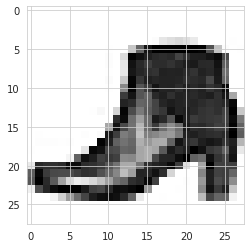

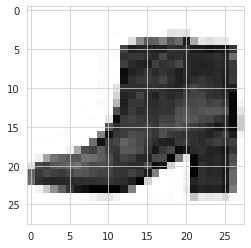

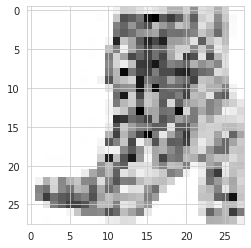

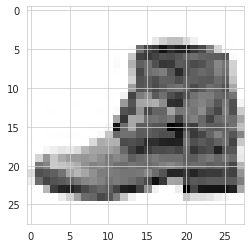

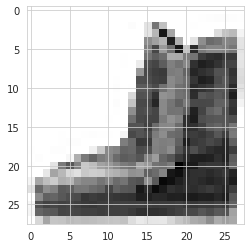

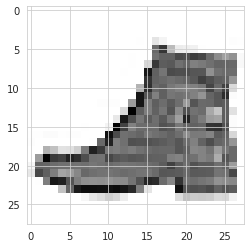

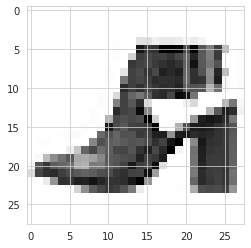

--------------------
Cluster= 1


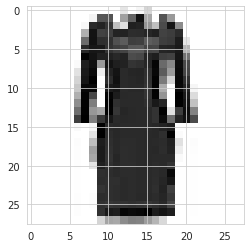

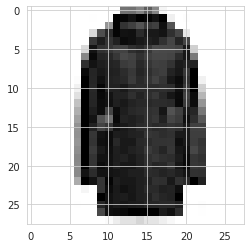

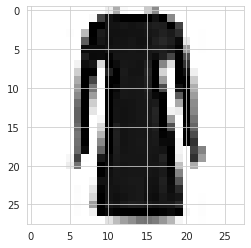

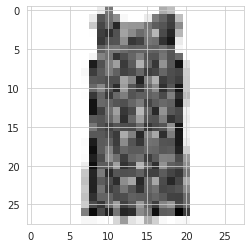

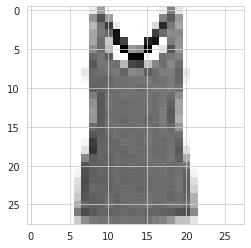

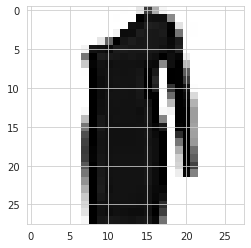

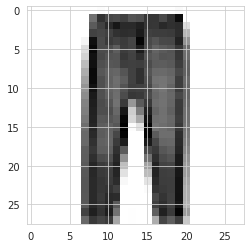

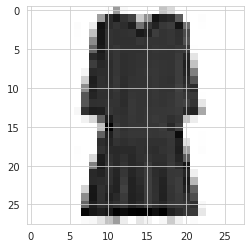

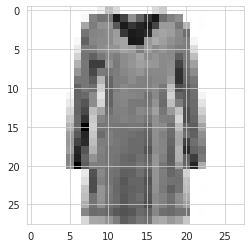

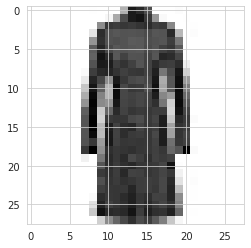

--------------------
Cluster= 2


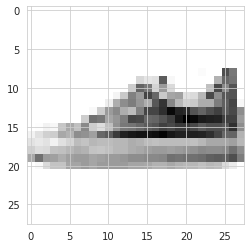

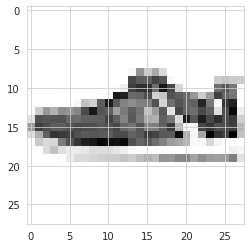

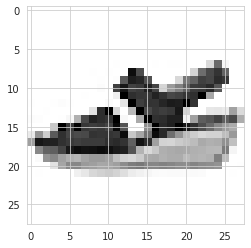

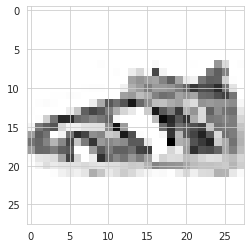

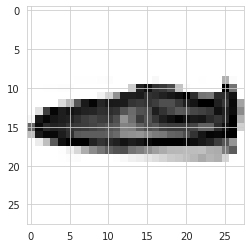

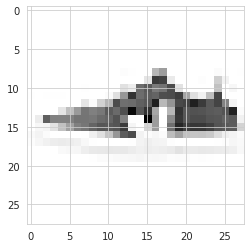

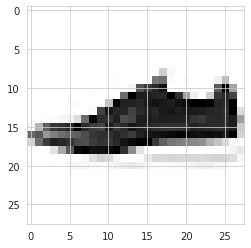

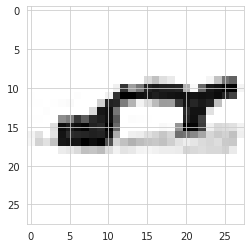

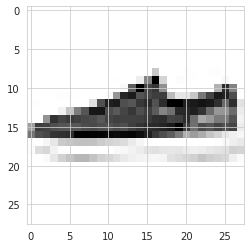

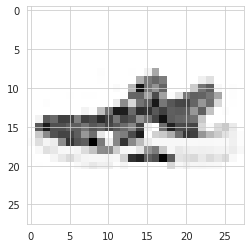

--------------------
Cluster= 3


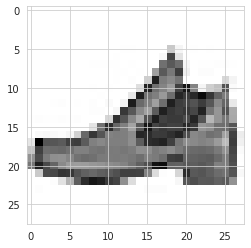

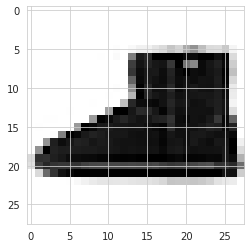

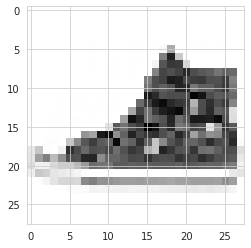

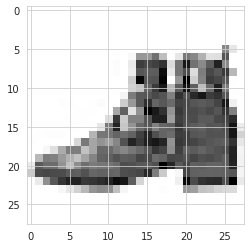

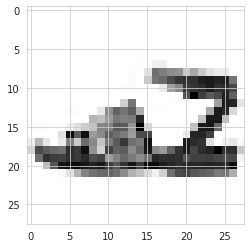

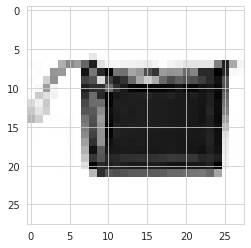

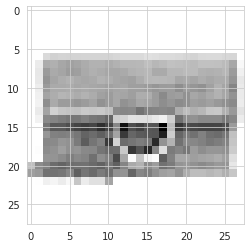

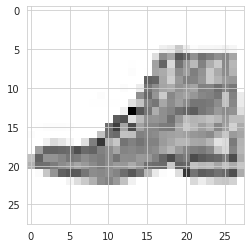

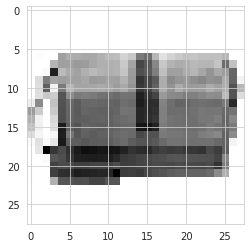

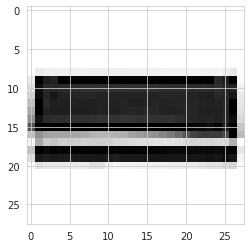

--------------------
Cluster= 4


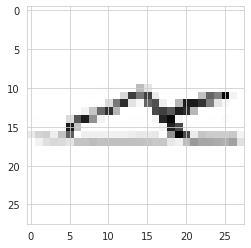

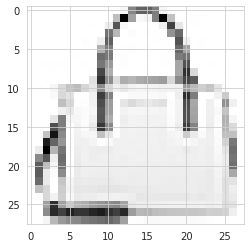

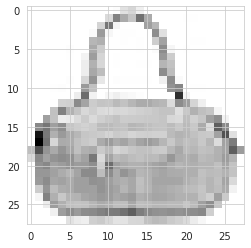

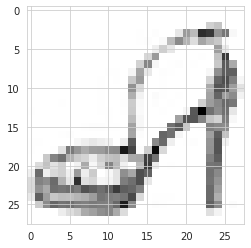

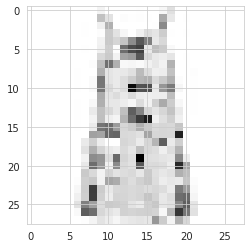

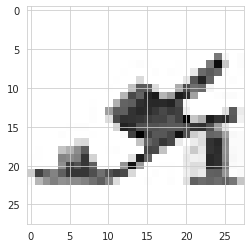

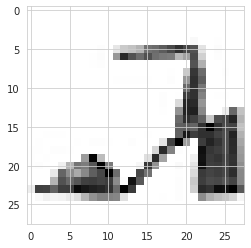

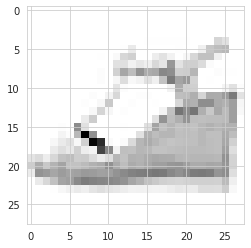

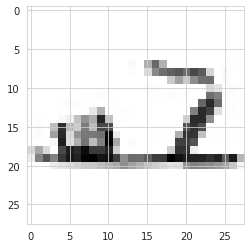

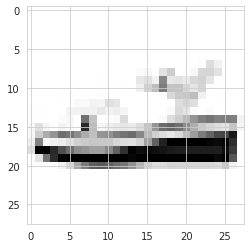

--------------------
Cluster= 5


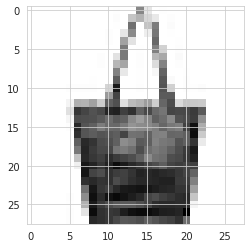

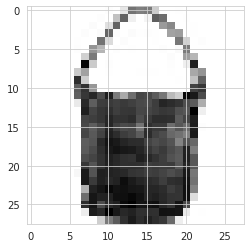

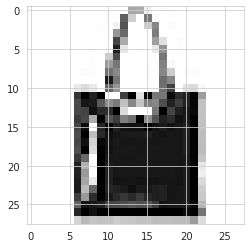

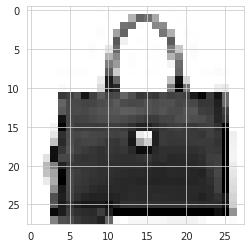

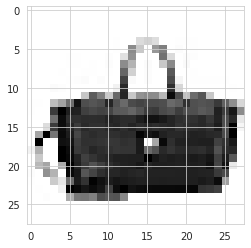

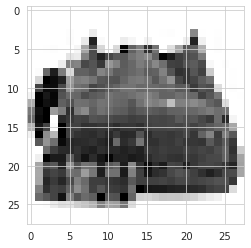

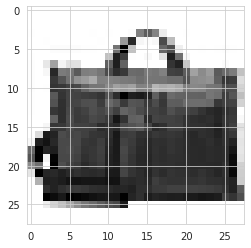

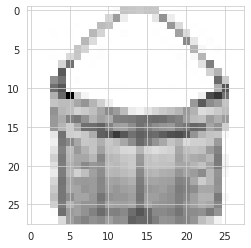

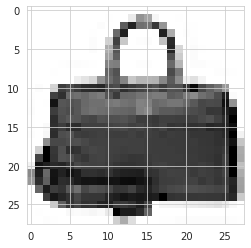

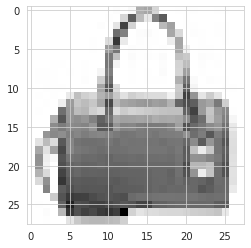

--------------------
Cluster= 6


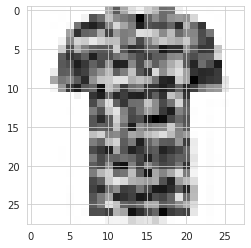

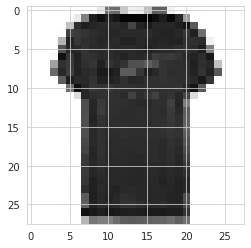

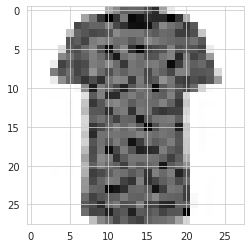

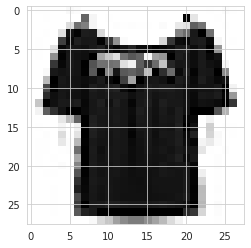

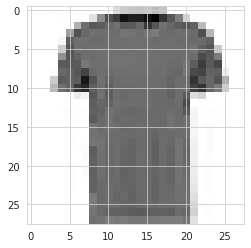

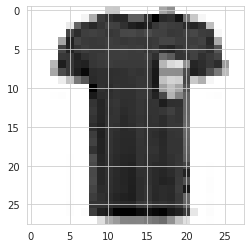

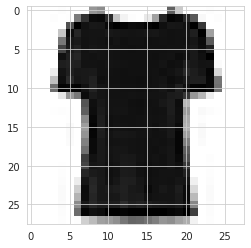

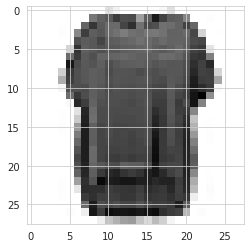

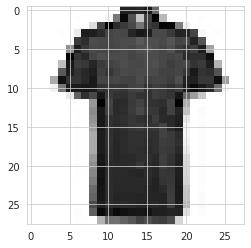

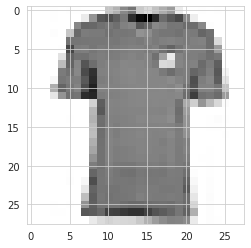

--------------------
Cluster= 7


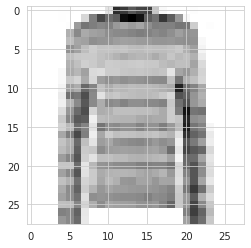

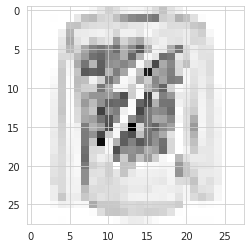

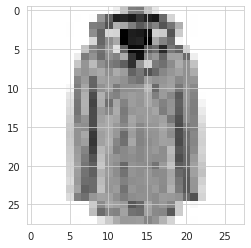

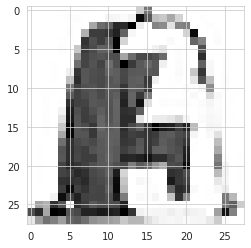

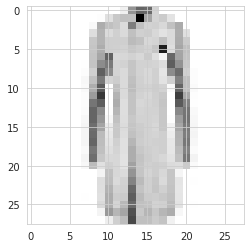

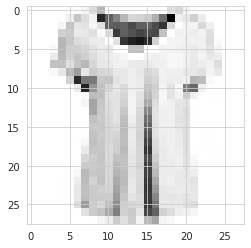

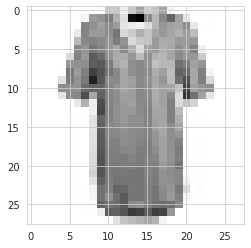

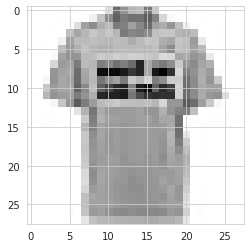

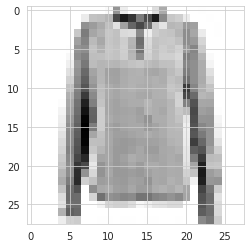

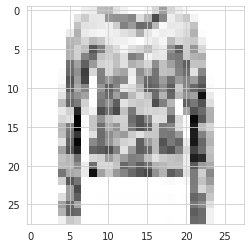

--------------------
Cluster= 8


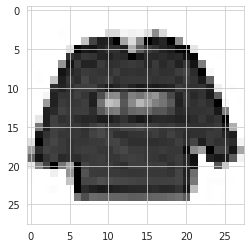

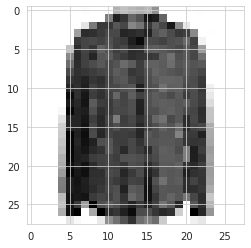

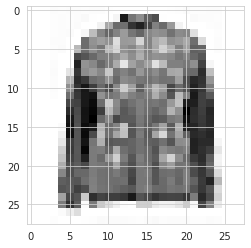

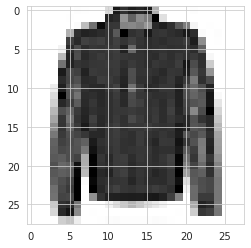

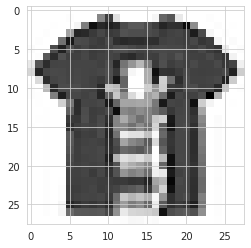

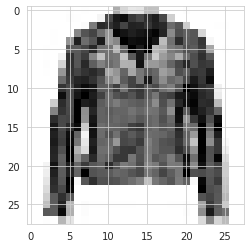

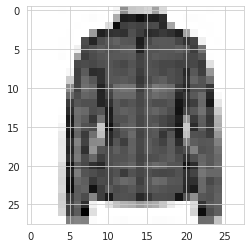

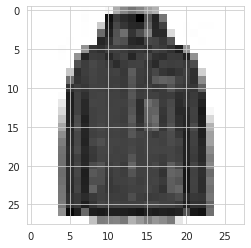

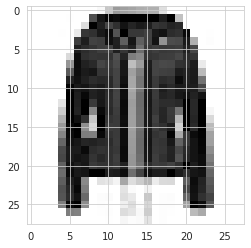

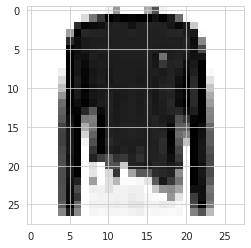

--------------------
Cluster= 9


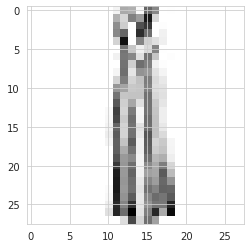

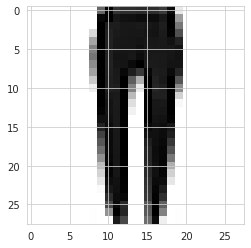

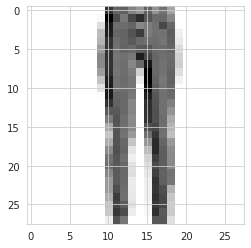

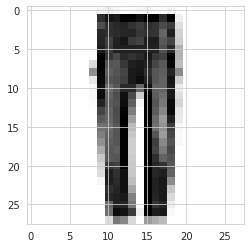

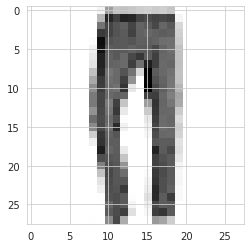

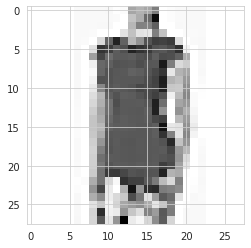

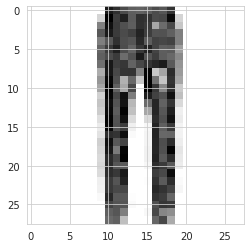

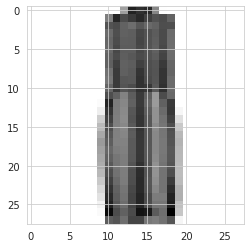

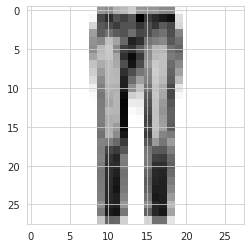

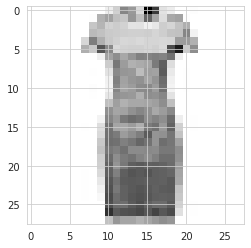

--------------------


In [94]:
xz=X
for i in range(0,10):
  k=0
  print('Cluster=',i)
  for j in range(len(y_Pred1)):
    if(k==10):
      print('-----')
      break
    if(i==y_Pred1[j]):
      img = xz[j].reshape((28,28))
      plt.imshow(img, cmap="Greys")
      plt.show()
      k=k+1

##**f)** Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster and visualize the cluster centers.

In [95]:
clusters = len(np.unique(y))
kMeans2 = KMeansAlgorithm(K=clusters, max_iters=150)
y_pred2 = kMeans2.fit(X, flag = False)

In [134]:
kMeans2.centroids

array([[3.65408039e-03, 1.09622412e-02, 8.47205305e-02, ...,
        4.42549736e-02, 1.15035864e-02, 3.78941670e-03],
       [0.00000000e+00, 1.01634117e-02, 8.01115982e-02, ...,
        4.22080510e+00, 7.90354723e-01, 9.34635313e-02],
       [1.51860289e-03, 1.63249810e-02, 6.37813212e-02, ...,
        8.50721336e+00, 3.68223235e+00, 4.54062263e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.15982721e-03, 3.23974082e-03, 1.72786177e-02, ...,
        3.36794199e+00, 1.56587473e+00, 7.40512188e-02],
       [0.00000000e+00, 0.00000000e+00, 1.09941888e-03, ...,
        6.84937961e-01, 4.64897126e-02, 0.00000000e+00]])

In [135]:
kMeans2.clusters

[[3,
  4,
  6,
  10,
  17,
  18,
  24,
  31,
  34,
  39,
  63,
  73,
  76,
  92,
  105,
  110,
  125,
  133,
  140,
  149,
  155,
  164,
  170,
  183,
  188,
  198,
  200,
  221,
  222,
  223,
  236,
  238,
  243,
  248,
  259,
  260,
  300,
  304,
  316,
  323,
  340,
  342,
  348,
  353,
  357,
  370,
  376,
  386,
  392,
  398,
  400,
  409,
  415,
  416,
  417,
  426,
  441,
  453,
  457,
  458,
  464,
  466,
  472,
  474,
  479,
  484,
  486,
  493,
  496,
  504,
  506,
  511,
  526,
  529,
  546,
  547,
  571,
  588,
  595,
  598,
  600,
  606,
  618,
  626,
  629,
  645,
  653,
  654,
  659,
  662,
  663,
  664,
  668,
  681,
  687,
  707,
  712,
  730,
  731,
  741,
  742,
  743,
  758,
  759,
  763,
  766,
  778,
  780,
  790,
  803,
  808,
  813,
  838,
  840,
  850,
  858,
  859,
  865,
  872,
  900,
  910,
  912,
  917,
  923,
  930,
  934,
  945,
  949,
  965,
  976,
  977,
  985,
  993,
  1002,
  1017,
  1028,
  1046,
  1048,
  1059,
  1071,
  1076,
  1081,
  1083,
  1095

In [96]:
y_Pred2 = [int(x) for x in y_pred2]
Counter(y_Pred2)

Counter({0: 7389,
         1: 5018,
         2: 2634,
         3: 6975,
         4: 3405,
         5: 7964,
         6: 6625,
         7: 7141,
         8: 6482,
         9: 6367})

##**g)** Visualize 10 images corresponding to each cluster.

Cluster= 0


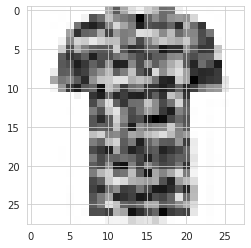

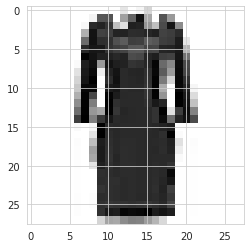

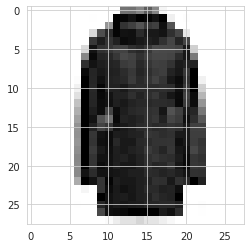

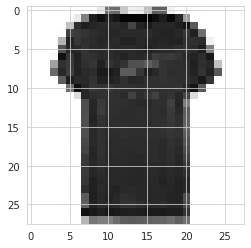

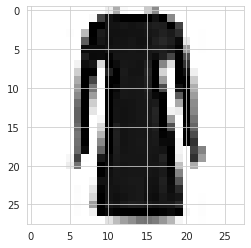

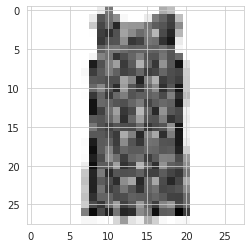

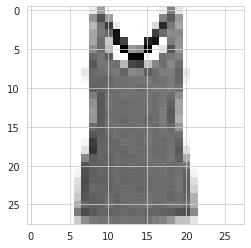

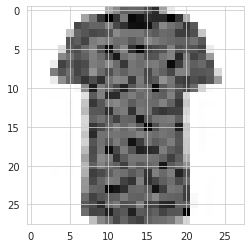

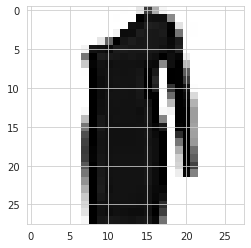

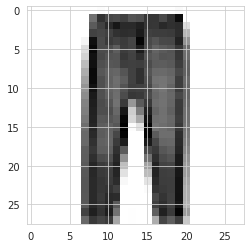

--------------------
Cluster= 1


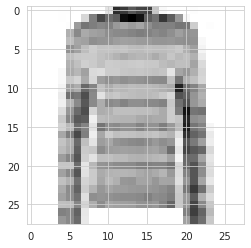

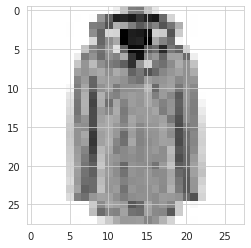

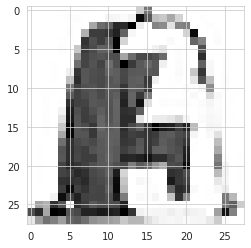

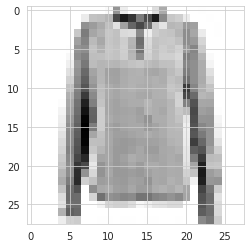

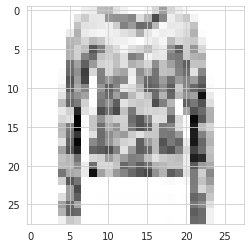

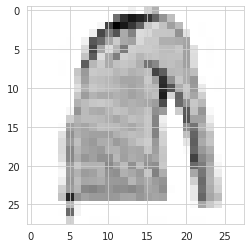

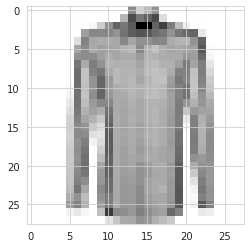

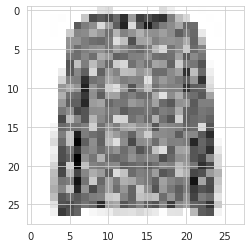

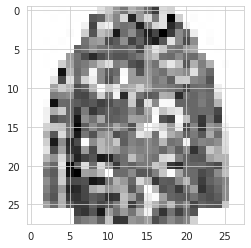

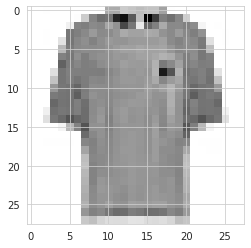

--------------------
Cluster= 2


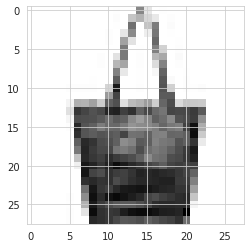

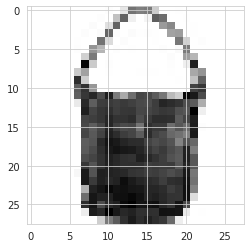

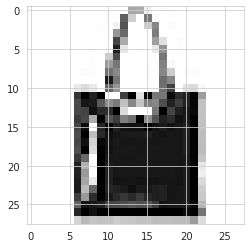

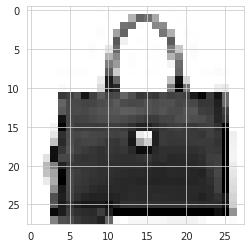

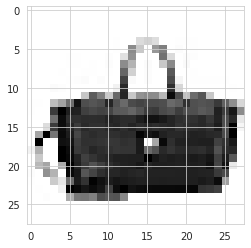

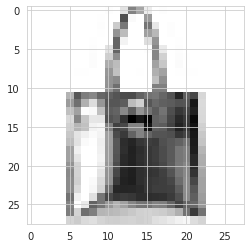

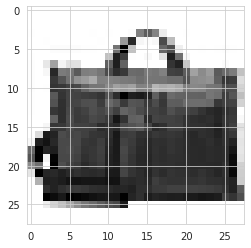

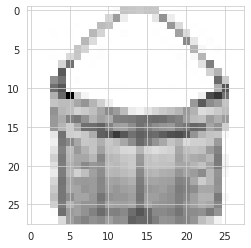

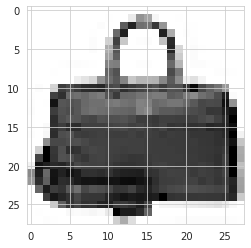

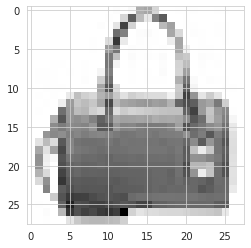

--------------------
Cluster= 3


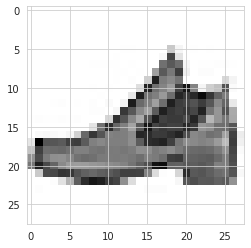

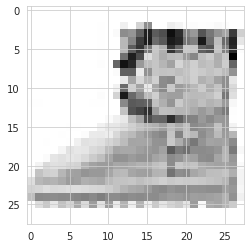

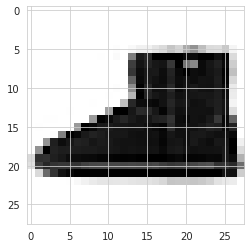

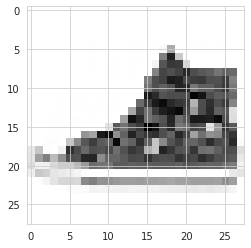

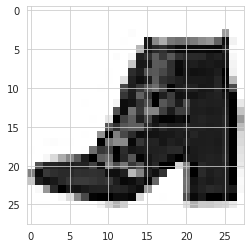

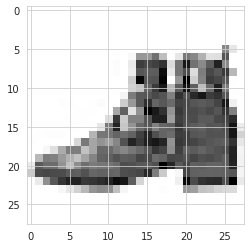

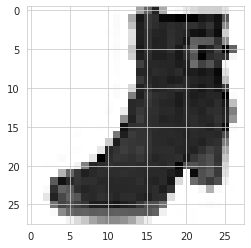

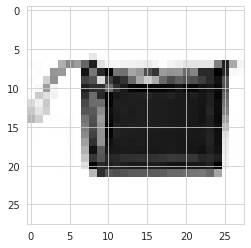

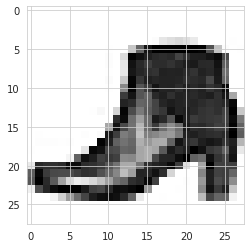

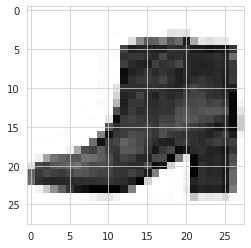

--------------------
Cluster= 4


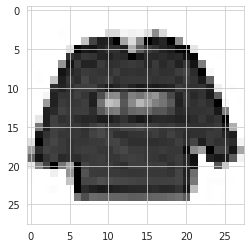

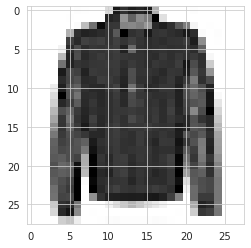

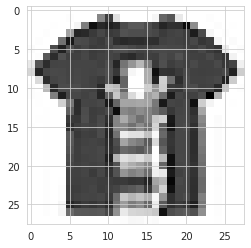

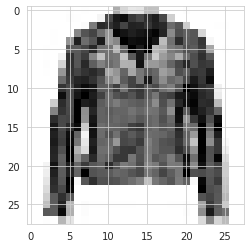

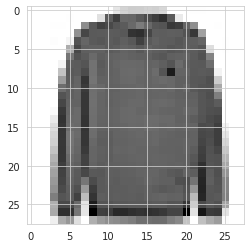

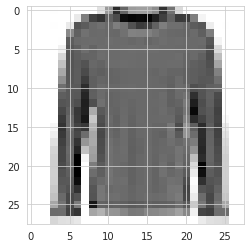

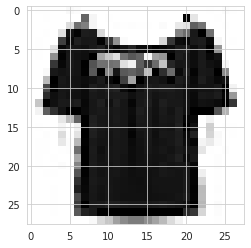

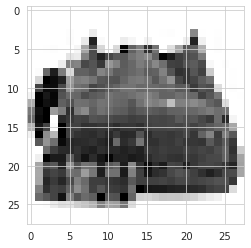

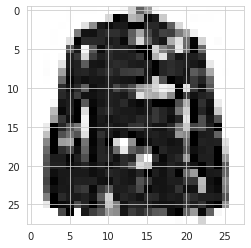

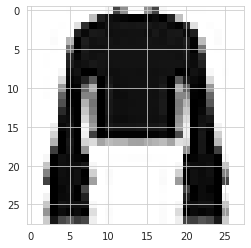

--------------------
Cluster= 5


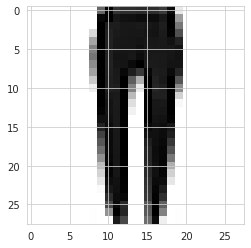

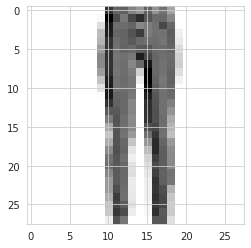

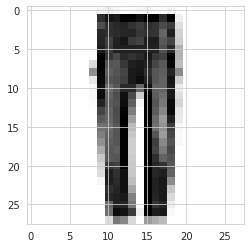

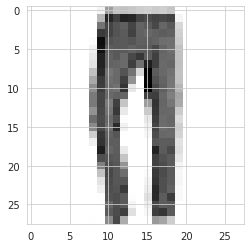

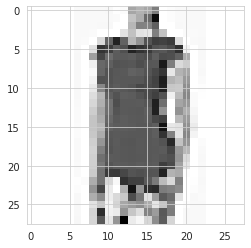

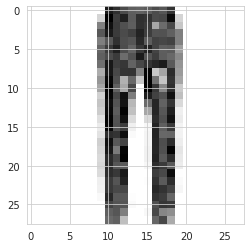

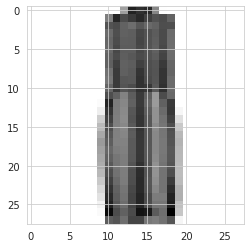

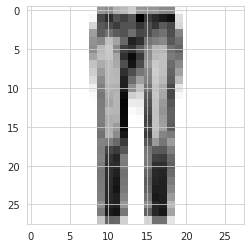

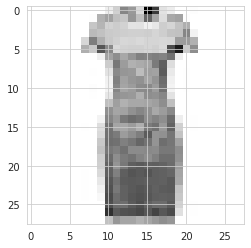

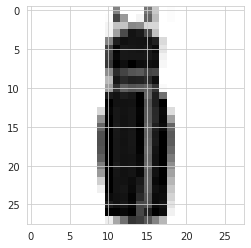

--------------------
Cluster= 6


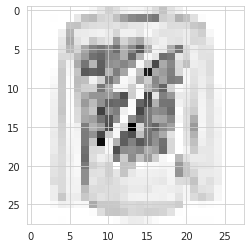

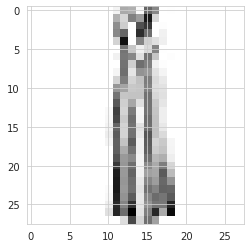

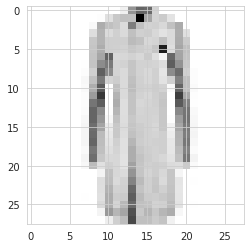

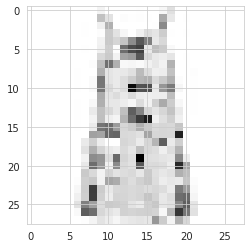

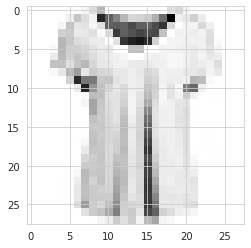

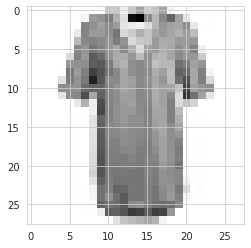

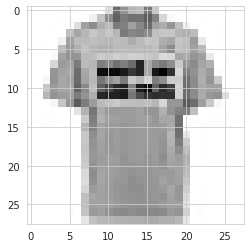

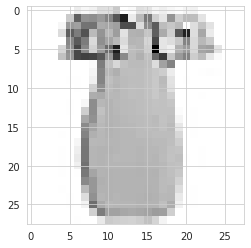

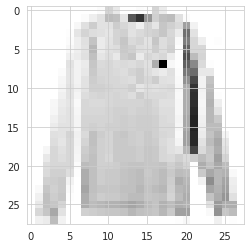

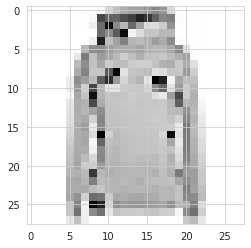

--------------------
Cluster= 7


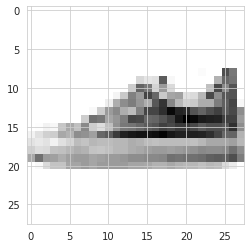

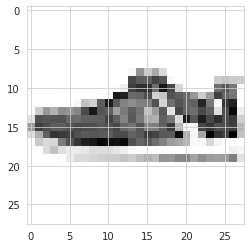

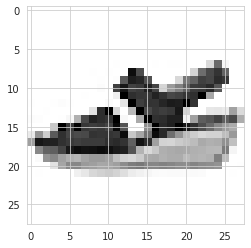

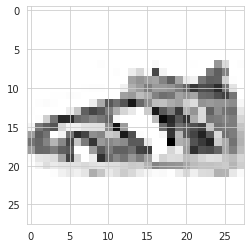

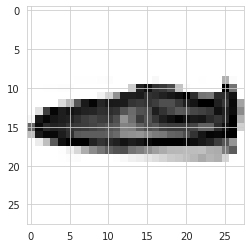

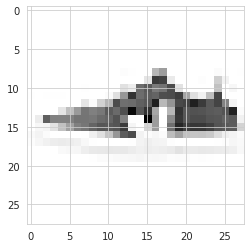

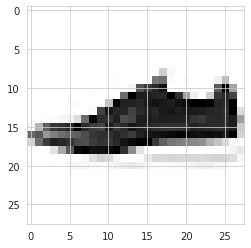

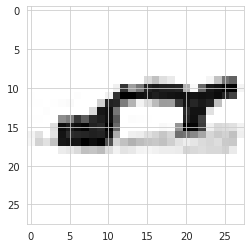

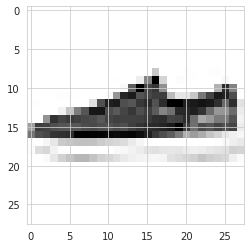

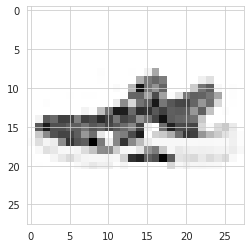

--------------------
Cluster= 8


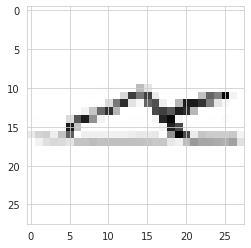

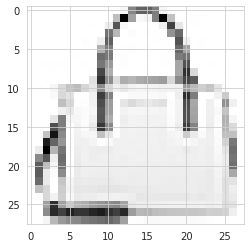

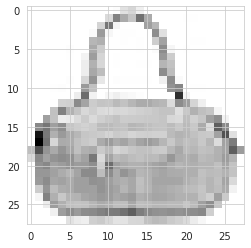

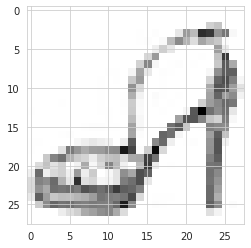

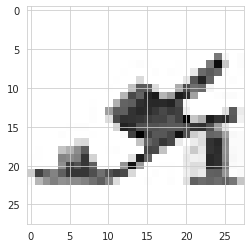

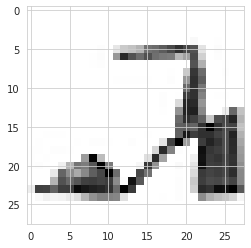

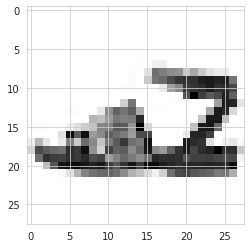

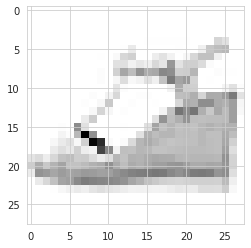

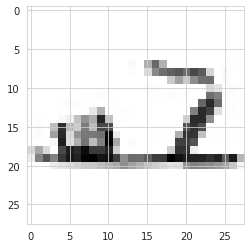

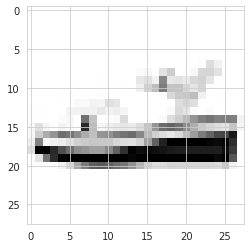

--------------------
Cluster= 9


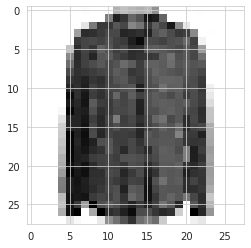

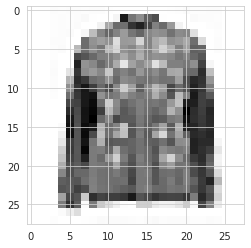

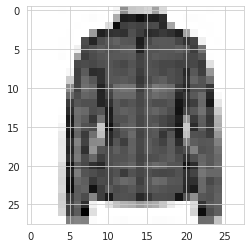

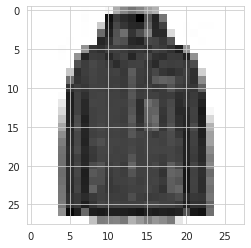

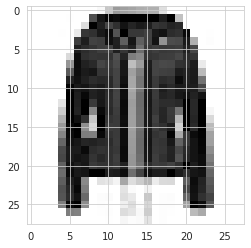

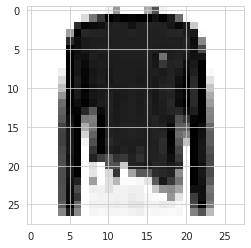

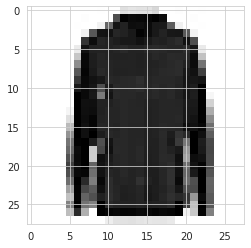

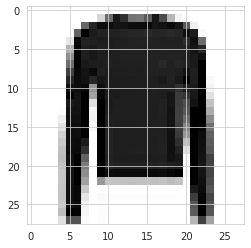

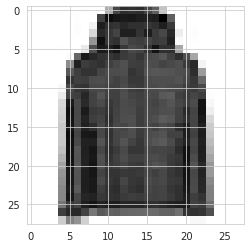

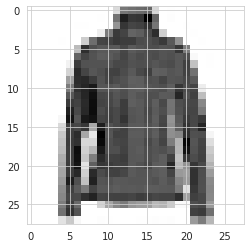

--------------------


In [97]:
xz=X
for i in range(0,10):
  k=0
  print('Cluster=',i)
  for j in range(len(y_Pred2)):
    if(k==10):
      print('--------------------')
      break
    if(i==y_Pred2[j]):
      img = xz[j].reshape((28,28))
      plt.imshow(img, cmap="Greys")
      plt.show()
      k=k+1

##**h)** Evaluate Clusters of part c and part f with Sum of Squared Error (SSE) method. Report the scores and comment on which case is a better clustering.

In [117]:
def SSE(X1,X2):
  return np.sum((X1 - X2)**2)

model1SSE=0
for centroid in range(10):
  for datapoints in kMeans1.clusters[centroid]:
    model1SSE += SSE(datapoints, kMeans1.centroids[centroid])
print("For the model with Random Centroids ")
print(model1SSE)

print("   ")

model2SSE=0
for centroid in range(10):
  for datapoints in kMeans2.clusters[centroid]:
    model2SSE += SSE(datapoints, kMeans2.centroids[centroid])
print("For the model with Centroids from each class")
print(model2SSE)

print(" ")
if(model1SSE > model2SSE):
    print("Model 1 with random centroids has higher SSE i.e. a difference of: ")
    print(model1SSE-model2SSE)
else:
    print("Model 2 with centroids from each class has higher SSE i.e. a difference of: ")
    print(model2SSE-model1SSE)

For the model with Random Centroids 
5.624081821588918e+16
   
For the model with Centroids from each class
5.624086015805701e+16
 
Model 1 with random centroids has higher SSE i.e. a difference of: 
41942167824.0


#**Question-3**

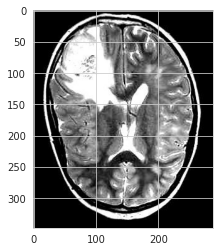

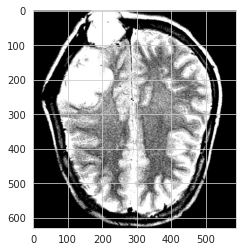

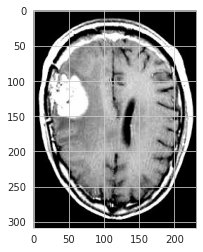

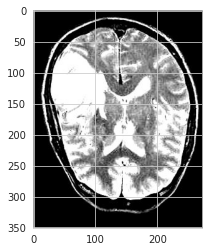

In [118]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Read Images
Path1 = '/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-9/Q-3/yes/y'
Path2 = '.jpg'
for i in range(4):
    img = mpimg.imread(Path1 + str(i) + Path2)
    # Output Images
    plt.imshow(img)
    plt.show()

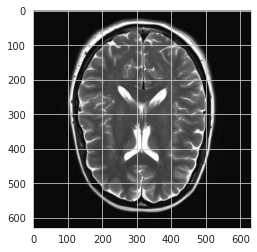

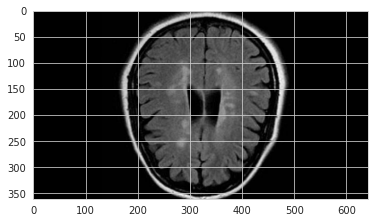

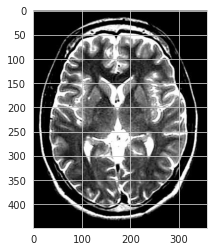

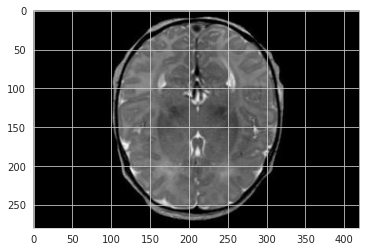

In [119]:
Path1 = '/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-9/Q-3/no/No'
Path2 = '.jpg'
for i in range(12, 16):
    img = mpimg.imread(Path1 + str(i) + Path2)
    # Output Images
    plt.imshow(img)
    plt.show()

##**A.** Check out the dataset & normalize the data so that the scale of each variable will be the same.

In [120]:
trainData = np.zeros((3000, 44100), dtype = int)
folder = '/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-9/Q-3/no'
images = Path(folder).glob('*.jpg')

i = 0
for image in images:
  originalImage = cv2.imread(str(image))
  grayImage = np.resize(originalImage, (210,210))
  grayImage = grayImage.flatten()
  trainData[i] = (grayImage)
  i = i+1

folder = '/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-9/Q-3/yes'
images = Path(folder).glob('*.jpg')
for image in images:
  originalImage = cv2.imread(str(image))
  grayImage = np.resize(originalImage, (210,210))
  grayImage = grayImage.flatten()
  trainData[i] = (grayImage)
  i = i+1

In [121]:
trainData = pd.DataFrame(trainData)
trainData

,0,1,2,3,4,5,6,7,8,9,...,44090,44091,44092,44093,44094,44095,44096,44097,44098,44099
0,3,3,3,3,3,3,3,3,3,3,...,166,154,154,154,103,103,103,56,56,56
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,2,2,2,2,2,2,2,2,2,...,96,100,100,100,108,108,108,116,116,116
3,0,0,0,0,0,0,0,0,0,0,...,110,100,100,100,114,114,114,113,113,113
4,1,1,1,1,1,1,1,1,1,1,...,88,91,91,91,89,89,89,85,85,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,1,...,5,8,8,8,7,7,7,5,5,5
2996,1,1,1,1,1,1,1,1,1,1,...,192,159,159,159,103,103,103,52,52,52
2997,0,0,0,0,0,0,0,0,0,0,...,44,47,47,47,49,49,49,48,48,48
2998,0,0,0,0,0,0,0,0,0,0,...,174,156,156,156,151,151,151,159,159,159


In [122]:
trainData = trainData/255
trainData

,0,1,2,3,4,5,6,7,8,9,...,44090,44091,44092,44093,44094,44095,44096,44097,44098,44099
0,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,...,0.650980,0.603922,0.603922,0.603922,0.403922,0.403922,0.403922,0.219608,0.219608,0.219608
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,...,0.376471,0.392157,0.392157,0.392157,0.423529,0.423529,0.423529,0.454902,0.454902,0.454902
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.431373,0.392157,0.392157,0.392157,0.447059,0.447059,0.447059,0.443137,0.443137,0.443137
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.345098,0.356863,0.356863,0.356863,0.349020,0.349020,0.349020,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.019608,0.031373,0.031373,0.031373,0.027451,0.027451,0.027451,0.019608,0.019608,0.019608
2996,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.752941,0.623529,0.623529,0.623529,0.403922,0.403922,0.403922,0.203922,0.203922,0.203922
2997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.172549,0.184314,0.184314,0.184314,0.192157,0.192157,0.192157,0.188235,0.188235,0.188235
2998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.682353,0.611765,0.611765,0.611765,0.592157,0.592157,0.592157,0.623529,0.623529,0.623529


##**B.** Use any dimension reduction technique and visualize the dataset & find out the number of communities available.

In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(trainData)

In [124]:
X

array([[ 10.50832615,  -6.10845788],
       [  1.4326158 ,  -1.47100906],
       [ -8.73207424,   3.50864593],
       ...,
       [-14.28892727,  -1.43351808],
       [  4.97795049,  -0.45853771],
       [ -3.95057578,  -2.88283877]])

In [125]:
labels = []
for i in range(1500):
    labels.append(0)
for i in range(1500):
    labels.append(1)

In [126]:
X = pd.DataFrame(X)
X.rename(columns = {0:'First', 1:'Second'}, inplace = True)
X['labels'] = labels
X

,First,Second,labels
0,10.508326,-6.108458,0
1,1.432616,-1.471009,0
2,-8.732074,3.508646,0
3,-1.745502,-13.208511,0
4,-9.913746,-10.079801,0
...,...,...,...
2995,-4.675441,-2.758292,1
2996,-1.301850,-5.230358,1
2997,-14.288927,-1.433518,1
2998,4.977950,-0.458538,1


##**C.** Visualize the communities from part A.

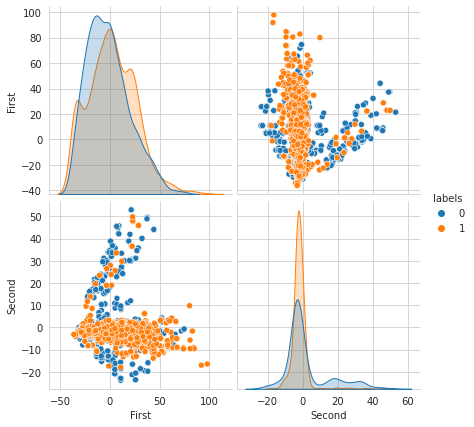

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(X, 'labels', size = 3)
plt.show()

##**D.** Apply Agglomerative hierarchical clustering (using sklearn).

In [128]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 2).fit(X)
k = model.labels_
k

array([0, 0, 0, ..., 0, 0, 0])

##**E.** Apply K-means (sklearn) and make a comparison between these two approaches & justify your results.

In [129]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(X)
kmeans.labels_
print(kmeans.inertia_)
y_k_means = kmeans.fit_predict(X)
y_k_means

835950.5476080241


array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [130]:
from sklearn.metrics import silhouette_score as sis
y = X['labels'].values
print("K-Means", sis(X,y_k_means))
print("Agglomerative Hierarchical", sis(X, k))

K-Means 0.48974613955537893
Agglomerative Hierarchical 0.45724765313047844
